# Problem Statement:1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import statsmodels.stats
from scipy import stats
import statsmodels.stats.api as sm
from scipy.stats import ttest_1samp, ttest_ind

In [2]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

#### Use methods of descriptive statistics to summarize data.

In [3]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.0+ KB


In [5]:
df.isnull().any()

Buyer/Spender       False
Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicatessen        False
dtype: bool

In [6]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [7]:
df_2=df[['Channel', 'Region','Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']]

#### Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [8]:
df_3=df_2.groupby('Region').sum()

In [9]:
df_3['Total']=df_3['Fresh']+df_3['Milk']+df_3['Grocery']+df_3['Frozen']+df_3['Detergents_Paper']+df_3['Delicatessen']

In [10]:
df_3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [11]:
df_4=df_2.groupby('Channel').sum()

In [12]:
df_4['Total']=df_4['Fresh']+df_4['Milk']+df_4['Grocery']+df_4['Frozen']+df_4['Detergents_Paper']+df_4['Delicatessen']

In [13]:
df_4

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


### Based on data, "Other" region(10677599) and "Hotel" channel (7999569) spent the most. Based on data, "Oporto" region (1555088) and "Retail" channel (6619931) spent the least.

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

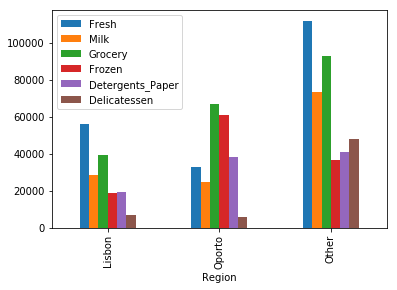

In [14]:
df_2.groupby('Region').max().plot(kind = 'bar')

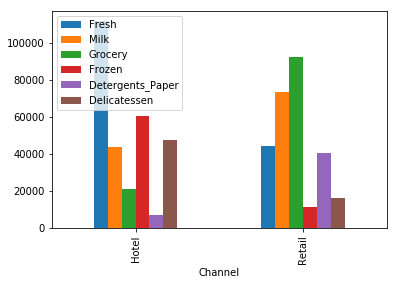

In [15]:
df_2.groupby('Channel').max().plot(kind = 'bar')

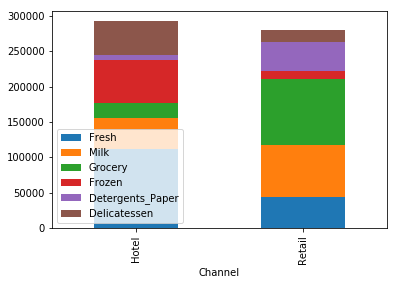

In [16]:
df_2.groupby('Channel').max().plot(kind = 'bar',stacked=True)

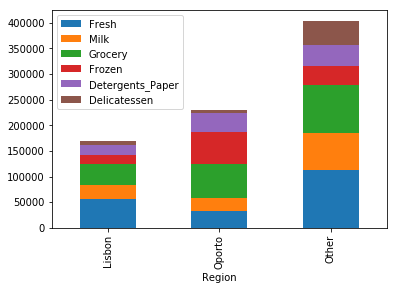

In [17]:
df_2.groupby('Region').max().plot(kind = 'bar',stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AACD7ABEF0>,
      dtype=object)

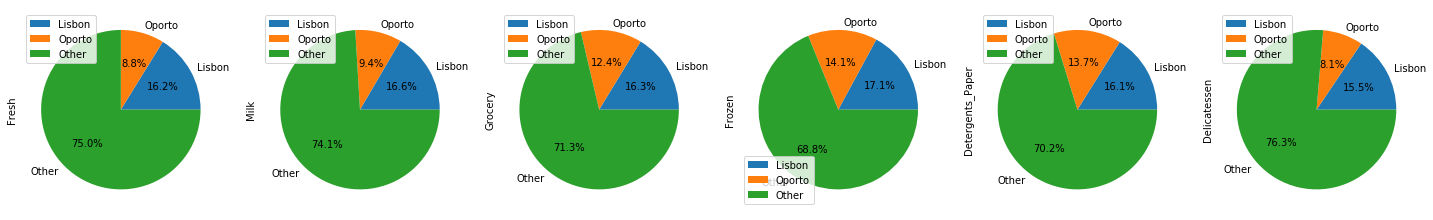

In [18]:
df_2.groupby('Region').sum().plot(kind='pie', autopct='%2.1f%%',subplots=True,figsize=(25,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AACE0E4BA8>,
      dtype=object)

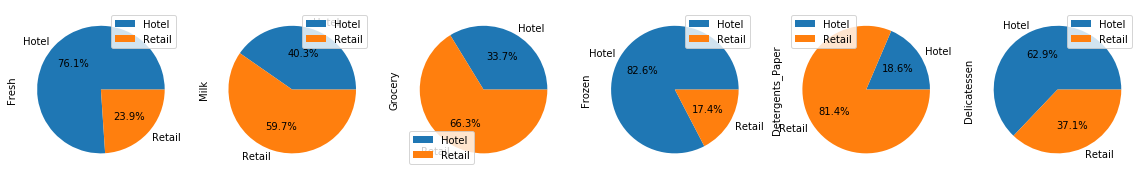

In [19]:
df_2.groupby('Channel').sum().plot(kind='pie', autopct='%2.1f%%',subplots=True,figsize=(20,10))

In [20]:
df_6=df[['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']]

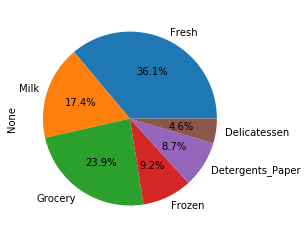

In [21]:
df_6.sum().plot(kind='pie', autopct='%2.1f%%')

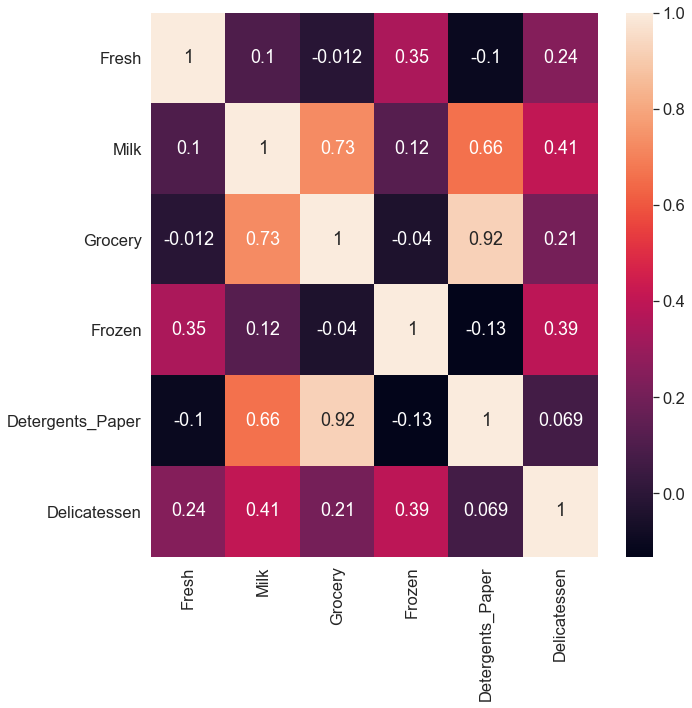

In [22]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
corre=df_6.corr()
sns.heatmap(corre,annot=True)

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [23]:
a1=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
for i in a1:
    a=df[i].mean()
    b=df[i].std()
    corr_variation=b/a
    print(i,'=====',corr_variation*100)

Fresh ===== 105.39179237473148
Milk ===== 127.32985840065413
Grocery ===== 119.51743730016824
Frozen ===== 158.03323836352914
Detergents_Paper ===== 165.46471385005154
Delicatessen ===== 184.94068981158384


### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

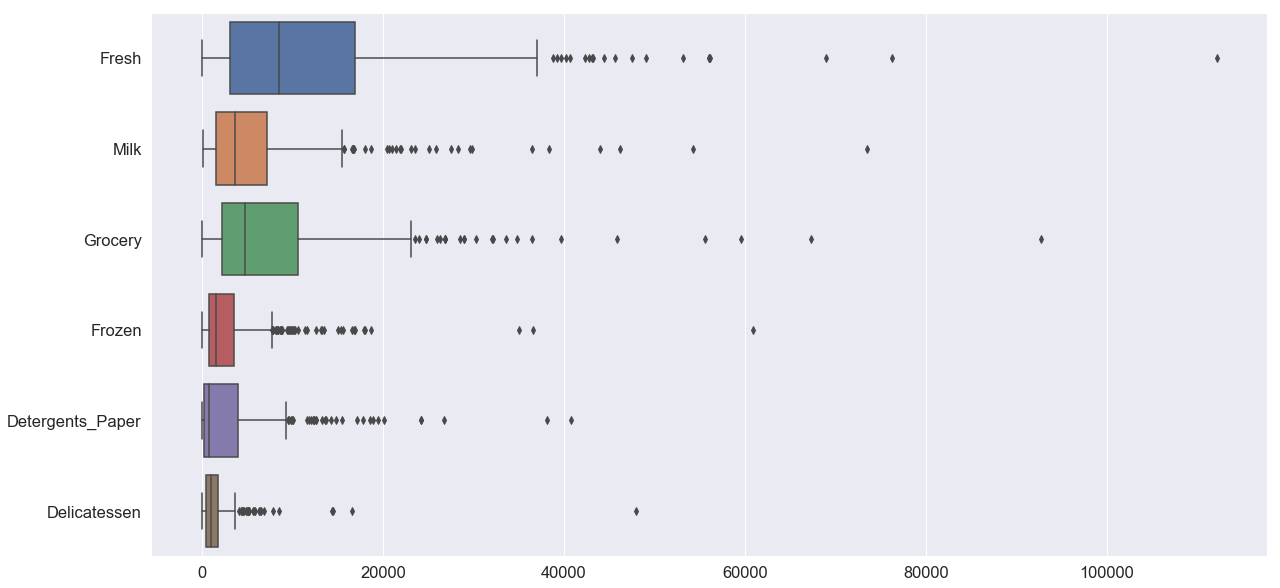

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_2,orient="h")

# Problem 2:

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [25]:
data = pd.read_csv('Survey-1.csv')

In [26]:
data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [27]:
pd.crosstab(data['Gender'],data['Major'],margins=True,margins_name='Total')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [28]:
pd.crosstab(data['Gender'],data['Grad Intention'],margins=True,margins_name='Total')

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


### 2.1.3. Gender and Employment

In [29]:
pd.crosstab(data['Gender'],data['Employment'],margins=True,margins_name='Total')

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


### 2.1.4. Gender and Computer

In [30]:
pd.crosstab(data['Gender'],data['Computer'],margins=True,margins_name='Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [31]:
data1=pd.crosstab(data['Gender'],data['Major'],margins=True,margins_name='Total')

#### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [32]:
for i in range(len(data1.columns)):
    x=data1.iloc[1][i]/data1.iloc[1][8]
    y=data1.columns[i]
    print('Probability for ',y,'---->',x*100, '%')

Probability for  Accounting ----> 13.793103448275861 %
Probability for  CIS ----> 3.4482758620689653 %
Probability for  Economics/Finance ----> 13.793103448275861 %
Probability for  International Business ----> 6.896551724137931 %
Probability for  Management ----> 20.689655172413794 %
Probability for  Other ----> 13.793103448275861 %
Probability for  Retailing/Marketing ----> 17.24137931034483 %
Probability for  Undecided ----> 10.344827586206897 %
Probability for  Total ----> 100.0 %


#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [33]:
for i in range(len(data1.columns)):
    x=data1.iloc[0][i]/data1.iloc[0][8]
    y=data1.columns[i]
    print('Probability for ',y,'---->',x*100, '%')

Probability for  Accounting ----> 9.090909090909092 %
Probability for  CIS ----> 9.090909090909092 %
Probability for  Economics/Finance ----> 21.21212121212121 %
Probability for  International Business ----> 12.121212121212121 %
Probability for  Management ----> 12.121212121212121 %
Probability for  Other ----> 9.090909090909092 %
Probability for  Retailing/Marketing ----> 27.27272727272727 %
Probability for  Undecided ----> 0.0 %
Probability for  Total ----> 100.0 %


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [34]:
Mod_Data=pd.crosstab(data['Gender'],data['Grad Intention'])
Mod_Data.drop('Undecided', inplace=True, axis=1)
Mod_Data

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data


### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [35]:
Mod_Prob_data=data[data['GPA']<3.00]
Mod_Prob_data

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.30,Unemployed,78.00,3,2,700,Laptop,30
10,11,Female,23,Senior,Economics/Finance,Yes,2.80,Full-Time,50.00,2,5,400,Laptop,200
23,24,Male,22,Senior,Undecided,Yes,2.60,Full-Time,45.00,1,5,400,Laptop,600
27,28,Female,20,Junior,International Business,Yes,2.90,Part-Time,50.00,3,1,900,Laptop,100
31,32,Male,20,Junior,Other,Yes,2.90,Part-Time,47.00,3,1,300,Laptop,300
33,34,Male,22,Senior,Retailing/Marketing,Yes,2.60,Full-Time,40.00,1,4,1400,Laptop,800


### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [36]:
Mod_Prob_data_1=data[data['Salary']>=50.00]
Mod_Prob_data_1.shape
pd.crosstab(Mod_Prob_data_1['Gender'],Mod_Prob_data_1['Salary'],margins=True,margins_name='Total')

Salary,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,Total
Gender,,,,,,,,,,
Female,5,0,0,5,5,0,1,1,1,18
Male,4,1,1,3,3,1,0,0,1,14
Total,9,1,1,8,8,1,1,1,2,32


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

C:\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


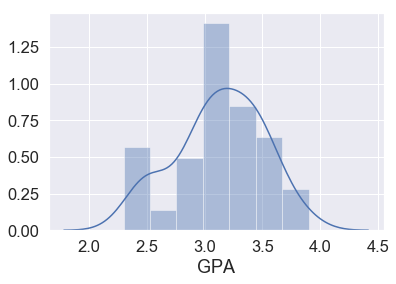

In [37]:
sns.distplot(data['GPA'])

In [38]:
shapiro_test = stats.shapiro(data['GPA'])
shapiro_test

(0.9685361981391907, 0.11204058676958084)

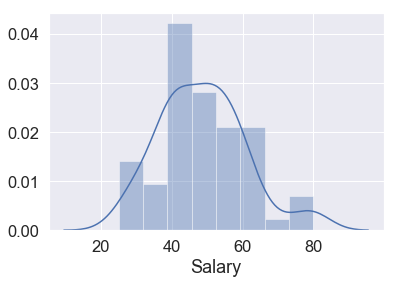

In [39]:
sns.distplot(data['Salary'])

In [40]:
shapiro_test = stats.shapiro(data['Salary'])
shapiro_test

(0.9565856456756592, 0.028000956401228905)

In [41]:
data['Salary'].skew()

0.5347008436225946

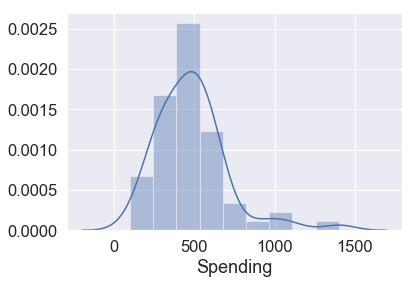

In [42]:
sns.distplot(data['Spending'])

In [43]:
shapiro_test = stats.shapiro(data['Spending'])
shapiro_test

(0.8777452111244202, 1.6854661225806922e-05)

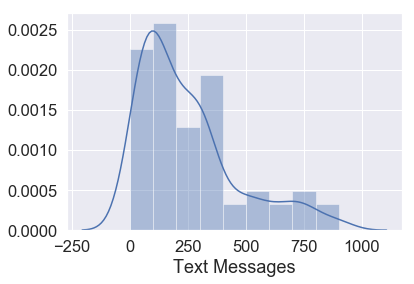

In [44]:
sns.distplot(data['Text Messages'])

In [45]:
shapiro_test = stats.shapiro(data['Text Messages'])
shapiro_test

(0.8594191074371338, 4.324040673964191e-06)

In [46]:
data[['GPA','Salary','Spending','Text Messages']].skew()

GPA             -0.31
Salary           0.53
Spending         1.59
Text Messages    1.30
dtype: float64

# Problem 3:

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


In [47]:
mydata = pd.read_csv('A+&+B+shingles.csv')
mydata.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

# For Sample A

## Step 1: Define null and alternative hypotheses

## •	𝐻0: mean of moisture content = 0.35

## •	𝐻𝐴: mean of moisture content < 0.35

## Step 2: Decide the significance level

##                                                Here we select 𝛼 = 0.05.

## Step 3: Identify the test statistic

## we use the t distribution and the 𝑡𝑆𝑇 test statistic for one sample

## Step 4: Calculate the p - value and test statistic

In [48]:
print("The sample size for this problem is",len(mydata['A']))

The sample size for this problem is 36


In [49]:
t_statistic, p_value = ttest_1samp(mydata['A'], 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


# Step 5: Decide to reject or accept null hypothesis

In [50]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.14955266289815025


# Sample B

In [51]:
print("The sample size for this problem is",len(mydata['B']))

The sample size for this problem is 36


In [52]:
mydata_B=mydata['B'].fillna(0.35)

## Step 1: Define null and alternative hypotheses

## •	𝐻0: mean of moisture content = 0.35

## •	𝐻𝐴: mean of moisture content < 0.35

## Step 2: Decide the significance level

##                                                Here we select 𝛼 = 0.05.

## Step 3: Identify the test statistic

## we use the t distribution and the 𝑡𝑆𝑇 test statistic for one sample

## Step 4: Calculate the p - value and test statistic

In [53]:
t_statistic, p_value = ttest_1samp(mydata_B, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.0405827185417524 p value: 0.00445138286795499 


# Step 5: Decide to reject or accept null hypothesis

In [54]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.00445138286795499


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

# Step 1: Define null and alternative hypotheses

## •	𝐻0: 𝜇𝐴- 𝜇𝐵 = 0 i.e 𝜇𝐴 = μB

## •	𝐻𝐴: 𝜇𝐴 - μB ≠ 0 i.e 𝜇𝐴≠ 𝜇𝐵

# Step 2: Decide the significance level

##                                                Here we select 𝛼 = 0.05.

# Step 3: Identify the test statistic

## we use the t distribution and the 𝑡𝑆𝑇 test statistic for two sample

# Step 4: Calculate the p - value and test statistic

In [55]:
t_statistic, p_value  =  stats.ttest_rel(mydata['A'],mydata_B)
print('tstat  %1.3f' % t_statistic)    
print("p-value for one-tail:", p_value/2)

tstat  0.905
p-value for one-tail: 0.18586475076401154


# Step 5: Decide to reject or accept null hypothesis

In [56]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("Paired two-sample t-test p-value=", p_value/2)

alpha_level = 0.01

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

Paired two-sample t-test p-value= 0.18586475076401154
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
